In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hdbscan
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics.cluster import pair_confusion_matrix
from clustergram import Clustergram


In [13]:
data = pd.read_csv('SouthGermanCredit.asc', delimiter=' ')
data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  1000 non-null   int64
 1   laufzeit  1000 non-null   int64
 2   moral     1000 non-null   int64
 3   verw      1000 non-null   int64
 4   hoehe     1000 non-null   int64
 5   sparkont  1000 non-null   int64
 6   beszeit   1000 non-null   int64
 7   rate      1000 non-null   int64
 8   famges    1000 non-null   int64
 9   buerge    1000 non-null   int64
 10  wohnzeit  1000 non-null   int64
 11  verm      1000 non-null   int64
 12  alter     1000 non-null   int64
 13  weitkred  1000 non-null   int64
 14  wohn      1000 non-null   int64
 15  bishkred  1000 non-null   int64
 16  beruf     1000 non-null   int64
 17  pers      1000 non-null   int64
 18  telef     1000 non-null   int64
 19  gastarb   1000 non-null   int64
 20  kredit    1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


<Axes: >

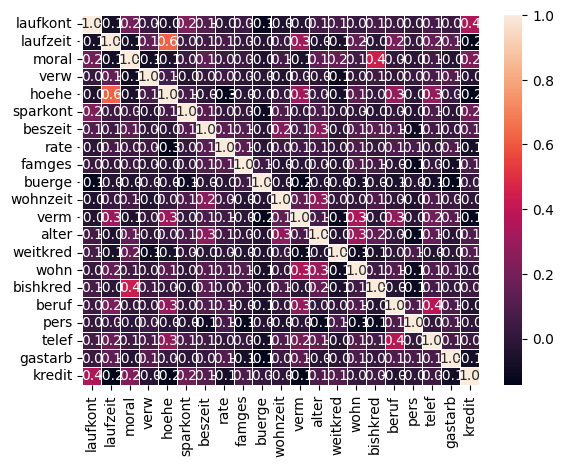

In [15]:
sns.heatmap(data=data.corr(), annot=True, fmt='.1f', robust=True, linewidths=0.5)

In [16]:
X = data.drop(columns='kredit')
y = data.kredit
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
distortions = []
for i in range(2, 11):
    kmeans = AgglomerativeClustering(n_clusters=i).fit(X)
    print(kmeans.n_features_in_)
    #hdbscan
    ss = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append (ss)
    dbs = davies_bouldin_score(X, kmeans.labels_)
    davies_bouldin_scores.append (dbs)
    chs = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores.append (chs)
    print(ss, dbs, chs)
    print(pair_confusion_matrix(y, kmeans.labels_))

20
0.6963201220299658 0.5369158957068771 2125.640593725942
[[158080 261920]
 [186238 392762]]
20
0.6637250807854153 0.49890206735152676 2530.2716235915586
[[167590 252410]
 [195208 383792]]
20
0.5437601820998759 0.5407829811289351 3034.98540114863
[[286148 133852]
 [378086 200914]]
20
0.5404850283531741 0.5045994853598168 3124.2334935263025
[[286702 133298]
 [378650 200350]]
20
0.5252009879523082 0.5190111213974554 3556.4228145704433
[[292722 127278]
 [385318 193682]]
20
0.5483773516392867 0.5086543317868307 4838.220421729488
[[320904  99096]
 [429376 149624]]
20
0.5517607370582711 0.49657529609996515 5183.496806823152
[[321366  98634]
 [429754 149246]]
20
0.545207056520776 0.49045930651446007 5707.394757321317
[[337892  82108]
 [456904 122096]]
20
0.5602668061978584 0.4806525079259104 6785.55478101661
[[340260  79740]
 [459912 119088]]


**Найкращі метрики при 4 кластерах**

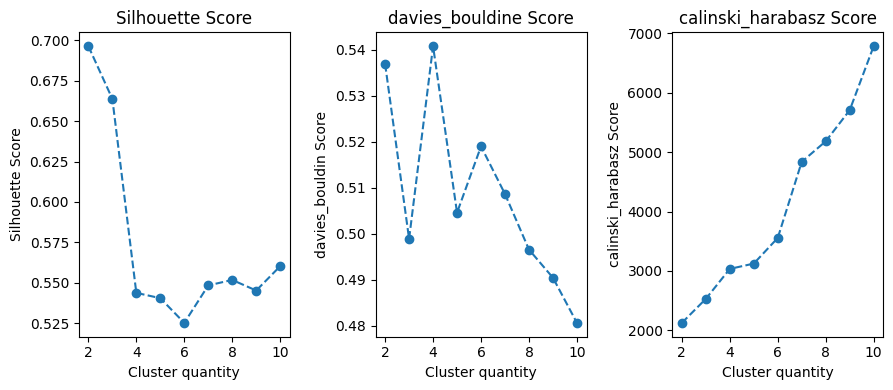

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.subplot(1, 4, 2)
plt.plot(range(2, 11), davies_bouldin_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('davies_bouldin Score')
plt.title('davies_bouldine Score')

plt.subplot(1, 4, 3)
plt.plot(range(2, 11), calinski_harabasz_scores, marker='o', linestyle='--')
plt.xlabel('Cluster quantity')
plt.ylabel('calinski_harabasz Score')
plt.title('calinski_harabasz Score')

plt.tight_layout()
plt.show()

**Графік підтверджує оптимальність вибору 4 кластерів**

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.008 seconds.
K=3 fitted in 0.006 seconds.
K=4 fitted in 0.008 seconds.
K=5 fitted in 0.007 seconds.
K=6 fitted in 0.006 seconds.
K=7 fitted in 0.006 seconds.


<Axes: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

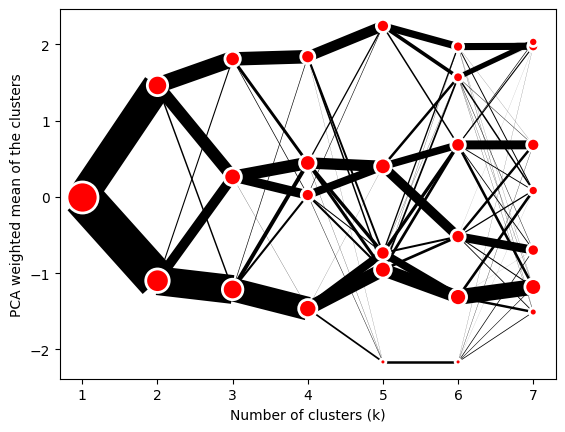

In [18]:
from sklearn.preprocessing import scale
df = scale(data.drop(columns=['kredit']).dropna())
cgram = Clustergram(range(1, 8))
cgram.fit(df)
cgram.plot()

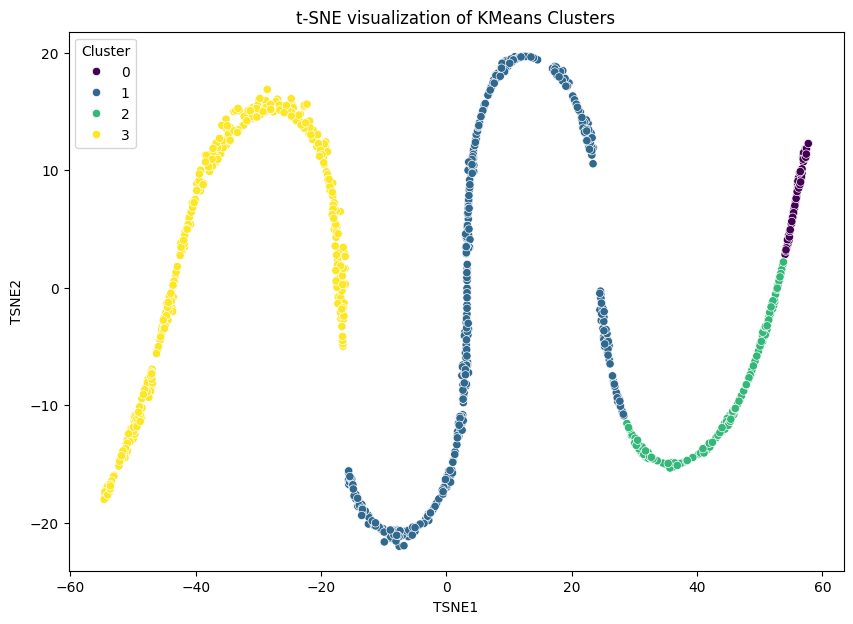

In [19]:
n_clusters = 4
kmeans = AgglomerativeClustering(n_clusters=n_clusters).fit(X)

# Fit t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results and the cluster labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = kmeans.labels_

# Plot t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE visualization of KMeans Clusters')
plt.show()

**Розподіл кращий ніж в першому випадку, але все ще проблема з 3 кластером**